In [1]:
from torchmdnet.datasets import QM9
import os
import rdkit
from rdkit import Chem
from tqdm import tqdm
import numpy as np


qm9_root = '/home/fengshikun/Backup/Denoising/data/qm9'
QM9_data = QM9(root=qm9_root, dataset_arg='energy_U0')


In [2]:
raw_sdf_file = os.path.join(qm9_root, 'raw/gdb9.sdf')
suppl = Chem.SDMolSupplier(raw_sdf_file, removeHs=False,
                                   sanitize=False)

In [6]:
with open(os.path.join(qm9_root, 'raw/uncharacterized.txt'), 'r') as f:
    skip = [int(x.split()[0]) - 1 for x in f.read().split('\n')[9:-2]]


mol_list = []
for i, mol in enumerate(tqdm(suppl)):
    if i in skip:
        continue
    mol_list.append(mol)

  0%|          | 0/133885 [00:00<?, ?it/s][08:46:39] Warning: molecule is tagged as 3D, but all Z coords are zero
[08:46:39] Warning: molecule is tagged as 3D, but all Z coords are zero
100%|██████████| 133885/133885 [00:11<00:00, 11516.31it/s]


In [4]:
len(QM9_data)

130831

In [32]:
idx = 130827
equi_mol = mol_list[idx]

In [152]:
# mol_list[0].GetConformer().GetPositions()

new_conf = np.zeros((equi_mol.GetNumAtoms(), 3), dtype=np.float32)
for i in range(equi_mol.GetNumAtoms()):
    new_conf[i] = equi_mol.GetConformer().GetAtomPosition(i)

In [153]:
QM9_data[idx].pos

tensor([[-1.4099,  1.3373,  0.4100],
        [-1.5646,  0.0991, -0.5169],
        [-0.8329, -0.7076,  0.6043],
        [ 0.2710, -1.6186,  0.1448],
        [ 1.5285, -0.7551,  0.3395],
        [ 1.2502,  0.4586,  1.0471],
        [-0.0574,  0.6112,  0.5411],
        [-0.0959,  0.3804, -0.9721],
        [ 0.8167, -0.8131, -1.0224],
        [-2.0904,  1.3271,  1.2637],
        [-1.4400,  2.2872, -0.1275],
        [-1.4540, -0.9673,  1.4592],
        [ 0.2778, -2.6979,  0.1958],
        [ 2.5159, -1.1518,  0.5274],
        [ 0.0137,  1.1994, -1.6802],
        [ 1.2607, -1.2468, -1.9068]])

In [154]:
new_conf

array([[-1.4099,  1.3373,  0.41  ],
       [-1.5646,  0.0991, -0.5169],
       [-0.8329, -0.7076,  0.6043],
       [ 0.271 , -1.6186,  0.1448],
       [ 1.5285, -0.7551,  0.3395],
       [ 1.2502,  0.4586,  1.0471],
       [-0.0574,  0.6112,  0.5411],
       [-0.0959,  0.3804, -0.9721],
       [ 0.8167, -0.8131, -1.0224],
       [-2.0904,  1.3271,  1.2637],
       [-1.44  ,  2.2872, -0.1275],
       [-1.454 , -0.9673,  1.4592],
       [ 0.2778, -2.6979,  0.1958],
       [ 2.5159, -1.1518,  0.5274],
       [ 0.0137,  1.1994, -1.6802],
       [ 1.2607, -1.2468, -1.9068]], dtype=float32)

In [8]:
from rdkit import Chem
import py3Dmol
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    """Draw molecule in 3D
    
    Args:
    ----
        mol: rdMol, molecule to show
        size: tuple(int, int), canvas size
        style: str, type of drawing molecule
               style can be 'line', 'stick', 'sphere', 'carton'
        surface, bool, display SAS
        opacity, float, opacity of surface, range 0.0-1.0
    Return:
    ----
        viewer: py3Dmol.view, a class for constructing embedded 3Dmol.js views in ipython notebooks.
    """
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    # viewer.addPropertyLabels("atom","","")

    # for i, at in enumerate(mol):
    #     default = {"stick": {'color': 'black'}}
    #     viewer.setStyle({'model': -1, 'serial': i+1}, at.get("pymol", default))

    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

In [33]:
viewer = MolTo3DView(equi_mol, size=(600, 300), style='stick')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [29]:
from torsion_utils import get_torsions, GetDihedral, apply_changes
# Chem.SanitizeMol(equi_mol)
no_h_mol = Chem.RemoveHs(equi_mol)
rotable_bonds = get_torsions([no_h_mol])

[09:18:38] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 7


KekulizeException: Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 7

In [14]:
print(rotable_bonds)

[]


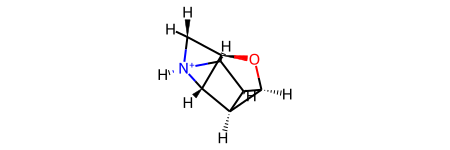

In [19]:
def show_atom_number(mol, label):
    # mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    for i, atom in enumerate(mol.GetAtoms()):
        atom.SetProp(label, str(i))
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    return mol

show_atom_number(equi_mol, 'molAtomMapNumber')
Chem.SanitizeMol(mol)
no_h_mol = Chem.RemoveHs(mol)
no_h_mol

In [84]:
np.save('qm9_mols.npy', mol_list)

In [103]:
org_angle = []
for rot_bond in rotable_bonds:
    org_angle.append(GetDihedral(equi_mol.GetConformer(), rot_bond))
org_angle = np.array(org_angle)
new_mol = apply_changes(equi_mol, org_angle, rotable_bonds)

In [20]:
error_cnt = []
error_cnt2 = []
empty_cnt = []
cnt = 0
for mol in tqdm(mol_list):
    try:
        Chem.SanitizeMol(mol)
        no_h_mol = Chem.RemoveHs(mol)
    except:
        error_cnt.append(cnt)
        cnt += 1
        continue
    rotable_bonds = get_torsions([no_h_mol])
    if not len(rotable_bonds):
        empty_cnt.append(cnt)
        cnt += 1
        continue
    try:
        org_angle = []
        for rot_bond in rotable_bonds:
            org_angle.append(GetDihedral(mol.GetConformer(), rot_bond))
        org_angle = np.array(org_angle)
        new_mol = apply_changes(mol, org_angle, rotable_bonds)
    except:
        error_cnt2.append(cnt)
    cnt += 1

  0%|          | 0/130831 [00:00<?, ?it/s][08:50:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:50:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:50:38] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:50:38] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:50:38] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:50:38] Explicit valence for atom # 2 C, 5, is greater than permitted
  1%|          | 940/130831 [00:00<00:13, 9390.61it/s][08:50:38] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:50:38] Explicit valence for atom # 2 C, 5, is greater than permitted
  1%|▏         | 1880/130831 [00:00<00:15, 8536.54it/s][08:50:38] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:50:38] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:50:38] Explicit valence for atom # 2 C, 5, is greater than permitted
[08:50:38] Explicit valence for atom # 2 C, 5,

In [21]:
len(error_cnt)

1656

In [22]:
len(error_cnt2)

247

In [23]:
len(empty_cnt)

56161

In [24]:
error_cnt[-10:]

[130068,
 130286,
 130349,
 130406,
 130537,
 130551,
 130801,
 130820,
 130826,
 130827]

In [159]:
import numpy as np
mg_empty = np.load('MG_E_part_empty.npy', allow_pickle=True)

In [161]:
for ele in mg_empty:
    if len(ele):
        print('error')

In [162]:
len(mg_empty)

122722